In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Read .xlsx file

In [2]:
df = pd.read_excel('Real estate valuation data set.xlsx')
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


Get some info about dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [5]:
df['X4 number of convenience stores'].value_counts().sort_index()

0     67
1     46
2     24
3     46
4     31
5     67
6     37
7     31
8     30
9     25
10    10
Name: X4 number of convenience stores, dtype: int64

Check null values

In [6]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

No
False    414
Name: No, dtype: int64

X1 transaction date
False    414
Name: X1 transaction date, dtype: int64

X2 house age
False    414
Name: X2 house age, dtype: int64

X3 distance to the nearest MRT station
False    414
Name: X3 distance to the nearest MRT station, dtype: int64

X4 number of convenience stores
False    414
Name: X4 number of convenience stores, dtype: int64

X5 latitude
False    414
Name: X5 latitude, dtype: int64

X6 longitude
False    414
Name: X6 longitude, dtype: int64

Y house price of unit area
False    414
Name: Y house price of unit area, dtype: int64



By this way, we understand that there is no values having null 

Let transform specific transaction date to make attributes convenient to understand 

In [7]:
df2 = df.copy()

In [8]:
MonthMap = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
df3 = df2['X1 transaction date'].apply(lambda x: pd.Series({'Year': int(x) ,'Month':list(MonthMap.values())[round((x%1)*12) - 1]}))
df2 = pd.concat([df2, df3], axis='columns')



Drop useless No and X1 transaction date attributes

In [9]:
df2.drop(['No', 'X1 transaction date'], axis = 1, inplace = True)


In [10]:
df2


,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Year,Month
0,32.0,84.87882,10,24.98298,121.54024,37.9,2012,November
1,19.5,306.59470,9,24.98034,121.53951,42.2,2012,November
2,13.3,561.98450,5,24.98746,121.54391,47.3,2013,July
3,13.3,561.98450,5,24.98746,121.54391,54.8,2013,June
4,5.0,390.56840,5,24.97937,121.54245,43.1,2012,October
...,...,...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4,2013,December
410,5.6,90.45606,9,24.97433,121.54310,50.0,2012,August
411,18.8,390.96960,7,24.97923,121.53986,40.6,2013,March
412,8.1,104.81010,5,24.96674,121.54067,52.5,2013,December


(array([ 8., 20., 43., 52., 44., 67., 71., 44., 36., 16.,  6.,  3.,  3.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  7.6  ,  13.095,  18.59 ,  24.085,  29.58 ,  35.075,  40.57 ,
         46.065,  51.56 ,  57.055,  62.55 ,  68.045,  73.54 ,  79.035,
         84.53 ,  90.025,  95.52 , 101.015, 106.51 , 112.005, 117.5  ]),
 <BarContainer object of 20 artists>)

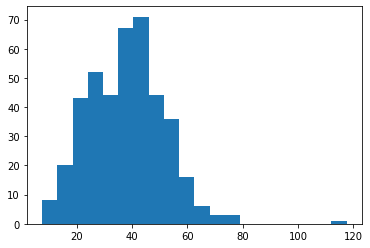

In [11]:
plt.hist(x = 'Y house price of unit area', data = df2, bins = 20)

<AxesSubplot:xlabel='Year', ylabel='count'>

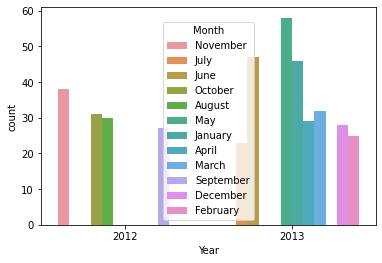

In [12]:
sns.countplot(x = 'Year', hue='Month', data = df2)

<AxesSubplot:xlabel='Month', ylabel='Year'>

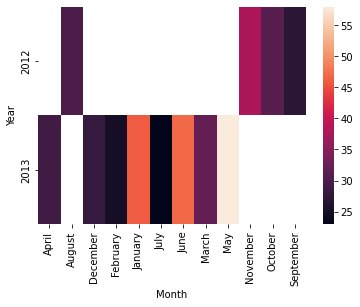

In [13]:
sns.heatmap(df2.groupby(['Year', 'Month']).count().pivot_table(values = 'Y house price of unit area', index='Year',columns='Month'))

We know that the data collected in New Taiwan City, so we can plot the map of the city and plot the Real Estate on this.

I have used openstreetmap.org to download the map of city by setting the border origins (BBox) 

In [14]:
BBox = (df2['X6 longitude'].min(),   df2['X6 longitude'].max(), df2['X5 latitude'].min(), df2['X5 latitude'].max())

In [15]:
BBox

(121.47353, 121.56627, 24.93207, 25.01459)

In [16]:
map = plt.imread('map (1).png')

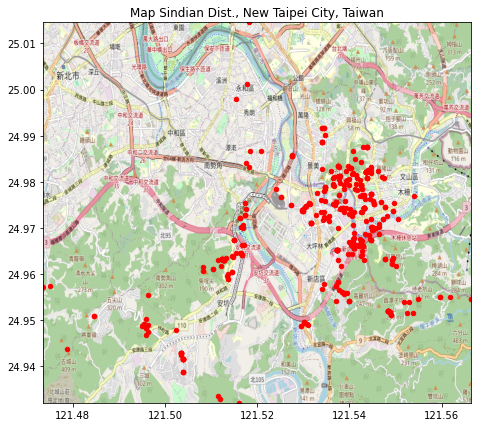

In [17]:
fig, ax = plt.subplots(figsize = (8,7))
ax.scatter(df2['X6 longitude'], df2['X5 latitude'], alpha= 1, c='r', s=20)
ax.set_title('Map Sindian Dist., New Taipei City, Taiwan')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map, extent = BBox, aspect= 'equal')

Find the correlation of dataframe

In [18]:
df2.corr()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Year
X2 house age,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567,0.049171
X3 distance to the nearest MRT station,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613,0.016519
X4 number of convenience stores,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005,-0.005586
X5 latitude,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307,0.008118
X6 longitude,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287,0.013177
Y house price of unit area,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000,0.081545
Year,0.049171,0.016519,-0.005586,0.008118,0.013177,0.081545,1.000000


Lets plot the correlation heatmap

<AxesSubplot:>

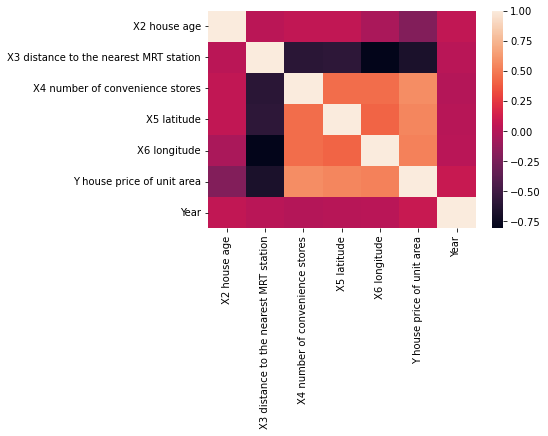

In [19]:
sns.heatmap(df2.corr())

Exploring the data

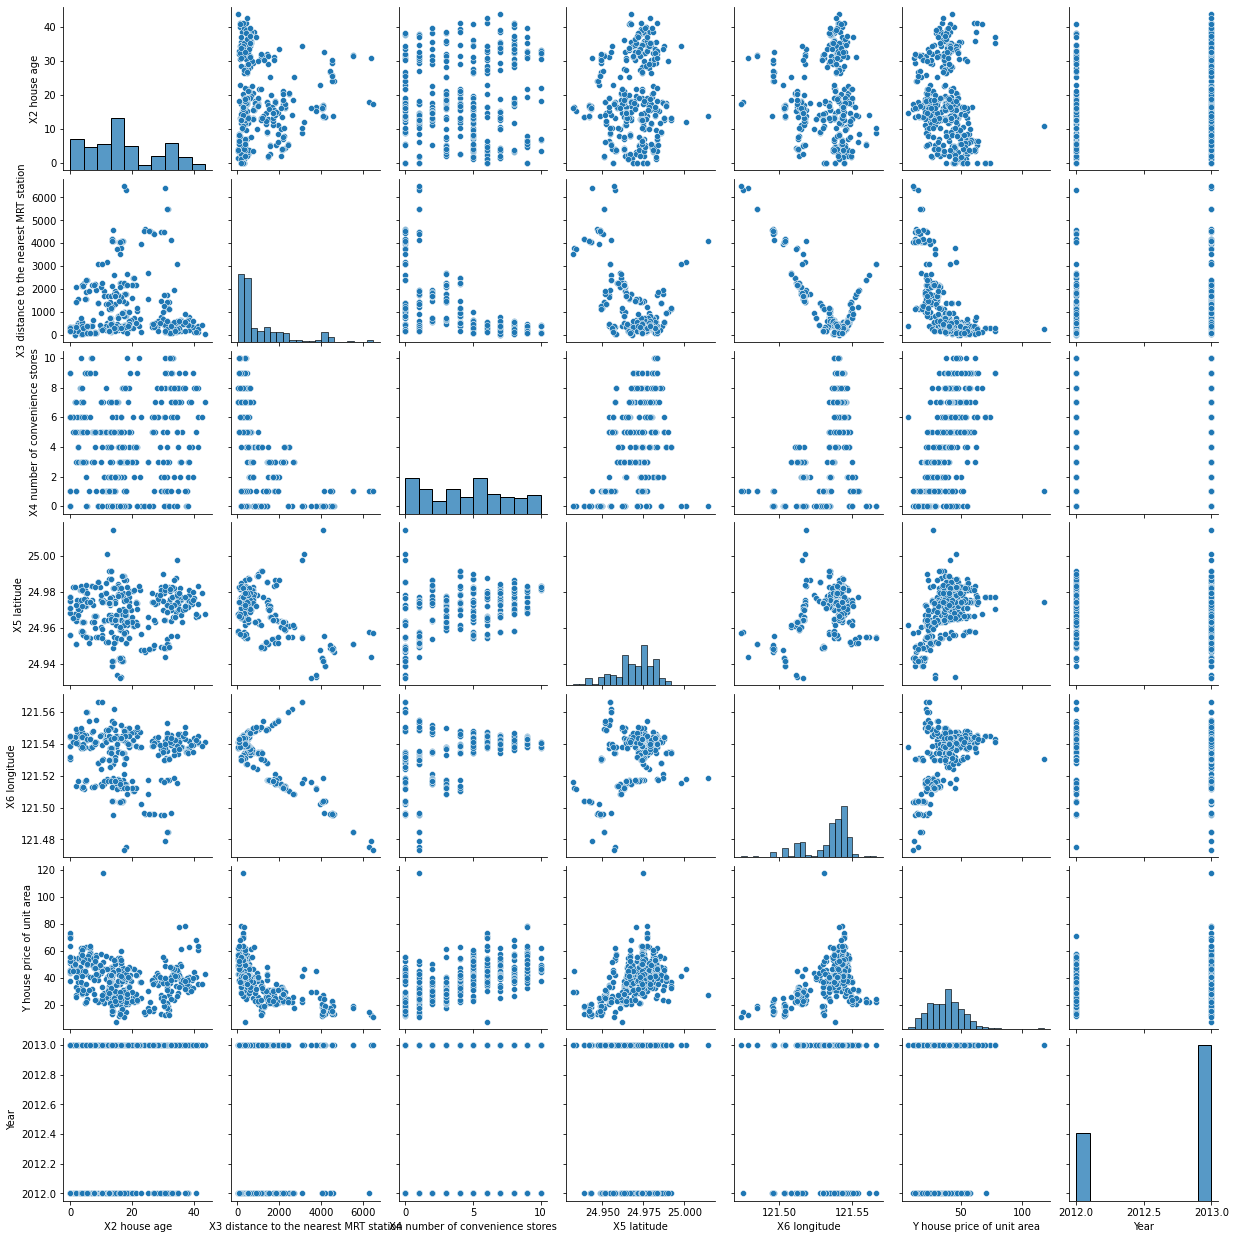

In [20]:
sns.pairplot(data = df2)

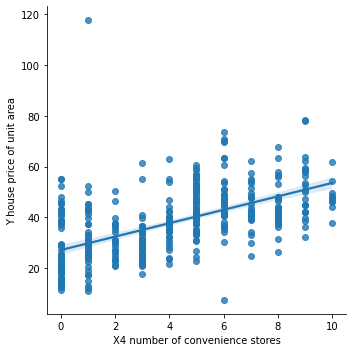

In [21]:
sns.lmplot(x = 'X4 number of convenience stores', y = 'Y house price of unit area', data = df2)

Training and testing data

In [22]:
X = df2.drop(['Y house price of unit area','Year','Month'], axis = 1)
X.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,32.0,84.87882,10,24.98298,121.54024
1,19.5,306.59470,9,24.98034,121.53951
2,13.3,561.98450,5,24.98746,121.54391
3,13.3,561.98450,5,24.98746,121.54391
4,5.0,390.56840,5,24.97937,121.54245


In [23]:
y = df2['Y house price of unit area']
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)
y_test

388    27.3
102    54.4
187    22.0
162    11.6
90     45.4
       ... 
164    55.2
228    46.6
39     46.2
261    24.4
185    21.5
Name: Y house price of unit area, Length: 104, dtype: float64

Training the Model

In [25]:
lm = LinearRegression()
lm.fit(X_train,y_train)
lm




LinearRegression()

Coefficients of the model

In [26]:
print(lm.coef_,lm.intercept_)

[-2.39157343e-01 -4.73776424e-03  1.09332205e+00  2.24000967e+02
 -4.20969538e+01] -433.78941524971884


In [27]:
coeff_df = pd.DataFrame(lm.coef_, X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
X2 house age,-0.239157
X3 distance to the nearest MRT station,-0.004738
X4 number of convenience stores,1.093322
X5 latitude,224.000967
X6 longitude,-42.096954


Predicting Test Data

In [28]:
X_test.shape

(104, 5)

C:\Users\danii\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Y house price of unit area'>

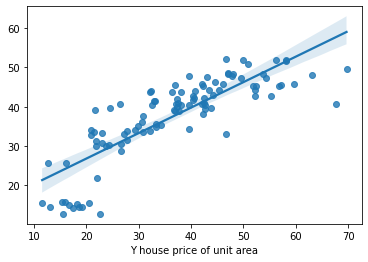

In [29]:
predictions = lm.predict(X_test)
sns.regplot(y_test,predictions)

Residuals

C:\Users\danii\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Y house price of unit area', ylabel='Density'>

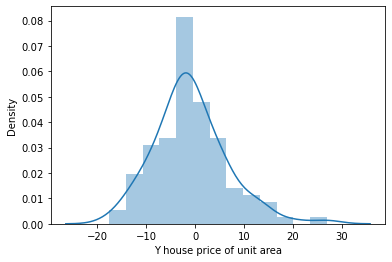

In [30]:
sns.distplot(y_test-predictions)

Evaluating the Model


In [31]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('R2:', metrics.r2_score(y_test,predictions))

MAE: 5.713009860551092
MSE: 56.18950777026401
RMSE: 7.495966099860912
R2: 0.6817699714807461


In [32]:
round(6.03)

6

In [34]:
X_b = np.c_[np.ones((414, 1)), df2['X4 number of convenience stores']]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(df2['Y house price of unit area'])
theta_best

array([27.18110478,  2.63765346])

In [41]:
 X_new = np.array([[0], [14]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([27.18110478, 64.10825327])

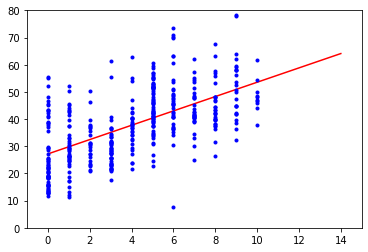

In [42]:
plt.plot(X_new, y_predict, "r-")
plt.plot(df2['X4 number of convenience stores'], df2['Y house price of unit area'], "b.")
plt.axis([-1, 15, 0, 80])
plt.show()